<a href="https://colab.research.google.com/github/Munazir/Deep-Learning-with-TensorFlow/blob/master/Into2AIML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Fashion MNIST Classification

Lets classify the fashion data into 10 categories

In [1]:
## Import the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)

1.13.1


In [0]:
## import the fashion Mnist data from Keras dataset

fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
fashion_mnist

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/keras/datasets/fashion_mnist/__init__.py'>

In [4]:
## load the data into environmet
(train_feature,train_label),(test_feature,test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


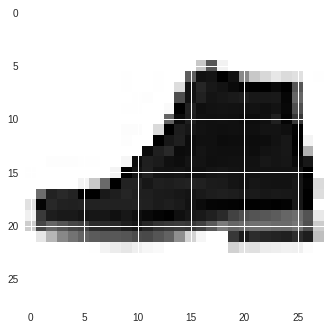

In [8]:
## Explore the data
import matplotlib.pyplot as plt
plt.imshow(train_feature[42])

In [11]:
## checking the numerical images
print(train_feature[42])
print(train_label[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187
   26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237
  255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234
  238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0   0 194 23

In [15]:
## checking the unique labels in the data
set(train_label.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [0]:
## Since the image has the pixel values which ranges from 0 to 255 so to train the Neural Network model lets normalise the data

train_feature = train_feature/255.0
test_feature = test_feature/255.0

In [18]:
## cheking the data after normalisation
print(train_feature[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
## Building the Neural Network model

model_nn = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(150,activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [23]:
## Compiling the model

model_nn.compile(optimizer=tf.train.AdamOptimizer(),
                 loss = 'sparse_categorical_crossentropy',
                metrics =['accuracy'])

# train the model
model_nn.fit(train_feature, train_label ,epochs= 10)

Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2785 - acc: 0.8963
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2657 - acc: 0.9006
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2541 - acc: 0.9057
Epoch 4/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2443 - acc: 0.9093
Epoch 5/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2362 - acc: 0.9115
Epoch 6/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2296 - acc: 0.9146
Epoch 7/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2216 - acc: 0.9169
Epoch 8/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2146 - acc: 0.9190
Epoch 9/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2073 - acc: 0.9219
Epoch 10/10
60000/60000 [==============================] - 6s 95us/sample - loss

In [24]:
## Lets Evaluate the model on test data

model_nn.evaluate(test_feature,test_label)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.3490 - acc: 0.8840


[0.3489769461274147, 0.884]

## Few exercises

In [0]:
## predict the labels for the test data

classification_predictions = model_nn.predict(test_feature)

In [32]:
## Print the labels
print(classification_predictions[1])

[4.4879460e-05 3.5395882e-20 9.9834728e-01 4.7278709e-17 1.3141693e-03
 4.0314941e-13 2.9371501e-04 2.3787483e-16 2.4234373e-11 3.7884879e-17]


In [31]:
print(test_label[1])

2


We can see the predictions returns the probablities of every class for this class starting from class 0 to 9 in the list and we can see that label at position 1 has the highest probablity indicating it has predicted corrected the actual label is also 1

## Exercise 2

In [34]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

import time
t0 = time.time()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)
t1= time.time()

print(" The total time taken",(t1-t0)/60.0)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 29s 482us/sample - loss: 0.1863
Epoch 2/5
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0734
Epoch 3/5
60000/60000 [==============================] - 30s 494us/sample - loss: 0.0494
Epoch 4/5
60000/60000 [==============================] - 29s 489us/sample - loss: 0.0340
Epoch 5/5
60000/60000 [==============================] - 28s 472us/sample - loss: 0.0264
 The total time taken 145.94455456733704
10000/10000 [==============================] - 1s 97us/sample - loss: 0.0757
[2.7848188e-09 5.9413766e-11 2.5733979e-07 1.9469837e-05 2.6841386e-16
 4.2909193e-08 1.1875009e-14 9.9997926e-01 1.0054608e-07 1.0288871e-06]
7


Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [36]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs={}):
    if(logs.get('loss')<0.1):
      print("\n Reached 70% accuracy so cancelling training !!")
      self.model.stop_training = True

callbacks1 = myCallback()
  

import time
t0 = time.time()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics =['accuracy'])

model.fit(training_images, training_labels, epochs=5,callbacks=[callbacks1])
t1= time.time()

print(" The total time taken",(t1-t0)/60.0)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.13.1
Epoch 1/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.2600 - acc: 0.9256
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1171 - acc: 0.9649
Epoch 3/5
59616/60000 [============================>.] - ETA: 0s - loss: 0.0795 - acc: 0.9762
 Reached 70% accuracy so cancelling training !!
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0794 - acc: 0.9762
 The total time taken 0.44547748963038125
10000/10000 [==============================] - 1s 50us/sample - loss: 0.0927 - acc: 0.9709
[4.7892360e-07 4.9277830e-08 6.7365567e-05 1.1657174e-03 1.1260277e-09
 1.4111496e-06 6.1436441e-13 9.9875212e-01 1.4912174e-06 1.1384996e-05]
7
